# <center>Math 589 Midterm Take-home-exam Solution</center>
<center>Yuan Yin A20447290</center>

## Question 2(b)
To apply the C-N scheme derived in (a), we use Thomas Algorithm to get the numerical result, notice we find solutions for two different terminal time: $T=0.1$ and $T = 0.2$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# function of p
def p(x):
    return np.exp(np.cos(2*np.pi*x))

In [3]:
# initial settings
dx = 0.01
mu = 0.1 # convergence satisfied
dt = mu*dx**2

x = np.array([i*dx for i in range(int(1/dx)+1)])

# Thomas Algorithm

p_minus = p(x-0.5*dx)
p_plus = p(x+0.5*dx)
b = 1+0.5*mu*(p_minus+p_plus)
b[-2] = b[-2]-0.5*mu*p_plus[-2]/(1+dx) # boundary condition
a = 0.5*mu*p_minus
c = 0.5*mu*p_plus

alpha = np.zeros(len(x))
alpha[1] = b[1]
for i in range(2,len(x)-1):
    alpha[i] = b[i]-(a[i]*c[i-1])/alpha[i-1]
    
T = [0.1, 0.2]
U_result = []
for t in T:
    N = int(t/dt)
    U = 4/(1+x**2) # initial condition
    
    for n in range(N):
        ## prepare at the beginning
        s = np.zeros(len(x))
        d = np.zeros(len(x))

        ## forward elimination
        d[1:-1] = 0.5*mu*p_minus[1:-1]*U[:-2]+(1-0.5*mu*(p_minus[1:-1]+p_plus[1:-1]))*U[1:-1]+0.5*mu*p_plus[1:-1]*U[2:]
        s[1] = d[1]
        for i in range(2,len(x)-1):
            s[i] = d[i]+(a[i]*s[i-1])/alpha[i-1]

        ## backward subsititution
        U_new = np.zeros(len(U))
        U_new[0] = 0 # boundary condition
        U_new[-2] = s[-2]/alpha[-2]
        U_new[-1] = U_new[-2]/(dx+1) # boundary condition
        for i in range(len(U_new)-3,0,-1):
            U_new[i] = (s[i]+c[i]*U_new[i+1])/alpha[i]

        U = U_new
    U_result.append(U)

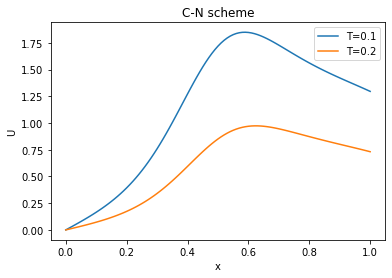

In [4]:
i = 0
for u in U_result:
    plt.plot(x,u,label='T='+str(T[i]))
    i+=1
plt.xlabel('x')
plt.ylabel('U')
plt.title('C-N scheme')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.legend()

## (c)
To verify the convergence numerically, we can fixed terminal time $T$, then choose different $(\Delta x, \Delta t)\to 0$(or different $\mu$), as long as they all satisfy the convergence condition $\mu\le\frac{1}{e}$. And then check if the solution is stable. Here we choose $\Delta x = [0.001,0.01], \mu=[0.01,0.1]$ and both of them are decreasing for every loop. Then we plot the final result for numerical solution $U$.

In [3]:
# fix T=0.1
# initial settings
Dx = np.linspace(0.1,0.01,10)
mu_arr = np.linspace(0.2,0.1,10) # convergence satisfied

T = [0.1]
X = []
U_result = []
for t in T:
    for j in range(len(Dx)):
        for l in range(len(mu_arr)):
            dx = Dx[j]
            mu = mu_arr[l]
            dt = mu*dx**2
            N = int(t/dt)
            x = np.array([k*dx for k in range(int(1/dx)+1)])
            X.append(x)

            # Thomas Algorithm
            p_minus = p(x-0.5*dx)
            p_plus = p(x+0.5*dx)
            b = 1+0.5*mu*(p_minus+p_plus)
            b[-2] = b[-2]-0.5*mu*p_plus[-2]/(1+dx) # boundary condition
            a = 0.5*mu*p_minus
            c = 0.5*mu*p_plus

            alpha = np.zeros(len(x))
            alpha[1] = b[1]
            for i in range(2,len(x)-1):
                alpha[i] = b[i]-(a[i]*c[i-1])/alpha[i-1]

            U = 4/(1+x**2) # initial condition

            for n in range(N):
                ## prepare at the beginning
                s = np.zeros(len(x))
                d = np.zeros(len(x))

                ## forward elimination
                d[1:-1] = 0.5*mu*p_minus[1:-1]*U[:-2]+(1-0.5*mu*(p_minus[1:-1]+p_plus[1:-1]))*U[1:-1]+0.5*mu*p_plus[1:-1]*U[2:]
                s[1] = d[1]
                for i in range(2,len(x)-1):
                    s[i] = d[i]+(a[i]*s[i-1])/alpha[i-1]

                ## backward subsititution
                U_new = np.zeros(len(U))
                U_new[0] = 0 # boundary condition
                U_new[-2] = s[-2]/alpha[-2]
                U_new[-1] = U_new[-2]/(dx+1) # boundary condition
                for i in range(len(U_new)-3,0,-1):
                    U_new[i] = (s[i]+c[i]*U_new[i+1])/alpha[i]

                U = U_new
            U_result.append(U)

Text(0.5, 1.0, 'C-N scheme')

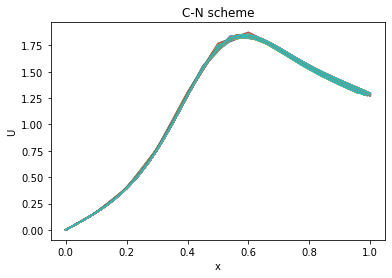

In [5]:
for j in range(len(U_result)):
    x = X[j]
    u = U_result[j]
    plt.plot(x,u,label=str(j))

plt.xlabel('x')
plt.ylabel('U')
plt.title('C-N scheme')

We can see that the numerical solution converges as $(\Delta x, \Delta t)\to 0$.

In [16]:
# # Inverse matrix
# U = 4/(1+x**2)

# al = -0.5*mu*p(x-0.5*dx)
# bl = 1+0.5*mu*(p(x-0.5*dx)+p(x+0.5*dx))
# cl = -0.5*mu*p(x+0.5*dx)

# Al = np.eye(len(al),len(al),k=-1)*np.roll(al,-1) + np.eye(len(bl),len(bl))*bl + np.eye(len(cl),len(cl),k=1)*np.roll(cl,1)

# ar = 0.5*mu*p(x-0.5*dx)
# br = 1-0.5*mu*(p(x-0.5*dx)+p(x+0.5*dx))
# cr = 0.5*mu*p(x+0.5*dx)

# Ar = np.eye(len(ar),len(ar),k=-1)*np.roll(ar,-1) + np.eye(len(br),len(br))*br + np.eye(len(cr),len(cr),k=1)*np.roll(cr,1)


# for n in range(N):
#     U_new = np.zeros(len(U))
#     U_new[1:] = np.dot(np.linalg.inv(Al[1:,1:]),np.dot(Ar[1:,1:],U[1:]))
#     U_new[0] = 0
#     U_new[-1] = U_new[-1]/(1+dx)
    
#     U = U_new